## Run and plot results of NEC2 for several antenna models

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
%%bash
nec2c -i ./25m_50r0.nec -o 25m_50r0.txt
nec2c -i ./25m_100r0.nec -o 25m_100r0.txt
nec2c -i ./25m_200r0.nec -o 25m_200r0.txt
nec2c -i ./25m_400r0.nec -o 25m_400r0.txt
nec2c -i ./25m_800r0.nec -o 25m_800r0.txt

In [31]:
%%bash
paste <(grep "FREQUENCY : " 25m_50r0.txt | cut -c 45-54) <(grep "EFFICIENCY" 25m_50r0.txt | cut -c 50-54) > 25m_50r0_efficiency.txt
paste <(grep "FREQUENCY : " 25m_100r0.txt | cut -c 45-54) <(grep "EFFICIENCY" 25m_100r0.txt | cut -c 50-54) > 25m_100r0_efficiency.txt
paste <(grep "FREQUENCY : " 25m_200r0.txt | cut -c 45-54) <(grep "EFFICIENCY" 25m_200r0.txt | cut -c 50-54) > 25m_200r0_efficiency.txt
paste <(grep "FREQUENCY : " 25m_400r0.txt | cut -c 45-54) <(grep "EFFICIENCY" 25m_400r0.txt | cut -c 50-54) > 25m_400r0_efficiency.txt
paste <(grep "FREQUENCY : " 25m_800r0.txt | cut -c 45-54) <(grep "EFFICIENCY" 25m_800r0.txt | cut -c 50-54) > 25m_800r0_efficiency.txt

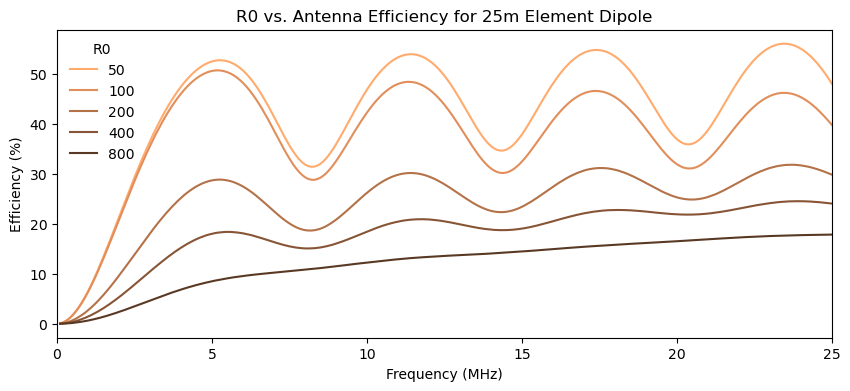

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))

colors = plt.cm.copper(np.linspace(0,1,8))

for i, r0 in enumerate([50, 100, 200, 400, 800]):
    df = pd.read_csv("25m_%dr0_efficiency.txt" % r0, sep="\\s+", names=["freq", "eff"])
    ax.plot(df["freq"], df["eff"], color=colors[7-(i+1)], label="%d" % r0)

ax.set(xlim = (0, 25), xlabel="Frequency (MHz)", ylabel="Efficiency (%)", title="R0 vs. Antenna Efficiency for 25m Element Dipole")
ax.legend(title="R0", frameon=False)
fig.savefig("25m_efficiency.png", dpi=200, bbox_inches="tight")